# FDS ASSIGNMENT 2
PREETESH VERMA
2018EEB1171

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset
iris=datasets.load_iris()

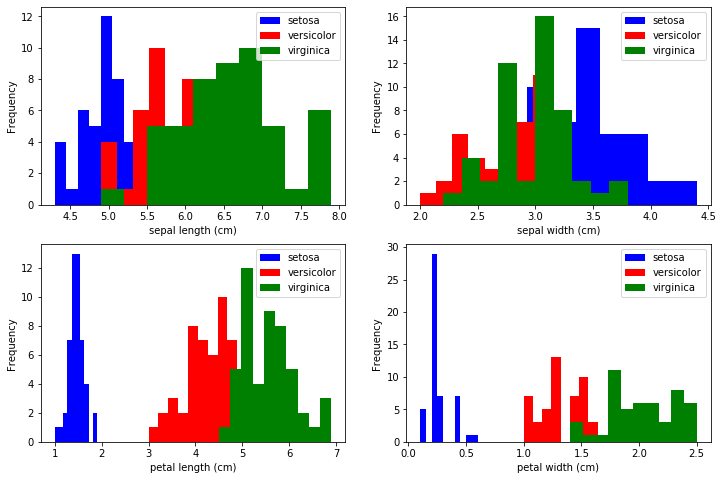

In [3]:
# bar plot visualisation of the dataset.All classes are shown separately vs all the features.
fig, axes = plt.subplots(nrows= 2, ncols=2,figsize=(12,8))
colors= ['blue', 'red', 'green']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris.target_names)), colors):
        ax.hist(iris.data[iris.target==label, i], label=             
                            iris.target_names[label], color=color,bins=10)
        ax.set_xlabel(iris.feature_names[i])  
        ax.set_ylabel('Frequency')
        ax.legend(loc='upper right')

plt.show()

In [4]:
type(iris)
label_name=iris.target_names
labels=iris.target
columns=['sepal_length','sepal_width','petal_length','petal_width']

In [5]:
print(type(iris))
label_name

<class 'sklearn.utils.Bunch'>


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0.5, 1.0, 'Data Visualization')

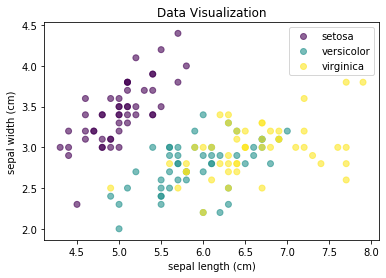

In [6]:
# scatter plot
features = iris.data.T
classes=['setosa', 'versicolor', 'virginica']
scatter=plt.scatter(features[0], features[1], alpha=0.6,
             c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(handles=scatter.legend_elements()[0], labels=classes);
plt.title('Data Visualization')

Text(0.5, 1.0, 'Data Visualization')

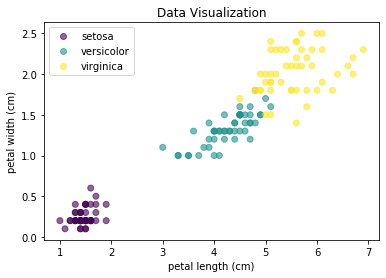

In [7]:
features = iris.data.T
classes=['setosa', 'versicolor', 'virginica']
scatter=plt.scatter(features[2], features[3], alpha=0.6,
             c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend(handles=scatter.legend_elements()[0], labels=classes);
plt.title('Data Visualization')

In [8]:
data=iris.data

In [9]:
df=pd.DataFrame(data,columns=columns)
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
output=pd.DataFrame(labels,columns=['Label'])

In [11]:
df['label']=output['Label']
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
# train-test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [13]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,label
44,5.1,3.8,1.9,0.4,0
64,5.6,2.9,3.6,1.3,1
106,4.9,2.5,4.5,1.7,2
31,5.4,3.4,1.5,0.4,0
92,5.8,2.6,4.0,1.2,1


In [14]:
output2=pd.DataFrame(test.label)

In [15]:
test.drop('label',1,inplace=True)
test.head()

,sepal_length,sepal_width,petal_length,petal_width
44,5.1,3.8,1.9,0.4
64,5.6,2.9,3.6,1.3
106,4.9,2.5,4.5,1.7
31,5.4,3.4,1.5,0.4
92,5.8,2.6,4.0,1.2


In [16]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,label
136,6.3,3.4,5.6,2.4,2
13,4.3,3.0,1.1,0.1,0
20,5.4,3.4,1.7,0.2,0
21,5.1,3.7,1.5,0.4,0
71,6.1,2.8,4.0,1.3,1


In [17]:
output1=pd.DataFrame(train.label)

In [18]:
train.drop('label',1,inplace=True)

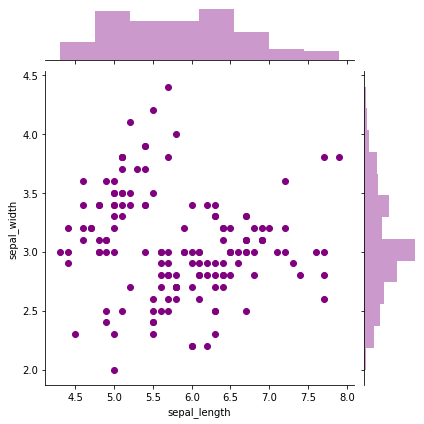

In [19]:
# joint plot with sepal width(y) vs sepal length(x).
sns.jointplot(x="sepal_length", y="sepal_width",color='purple',data=df)

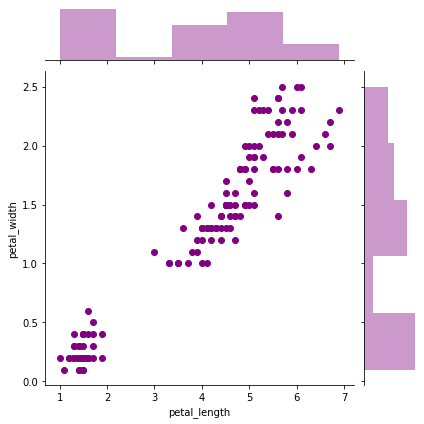

In [20]:
sns.jointplot(x="petal_length", y="petal_width",color='purple',data=df)

In [21]:
iris1=df

In [22]:
iris1['label']=output
iris1['label']=iris1['label'].map({0:'setosa',1:'vesicolor',2:'virginica'})

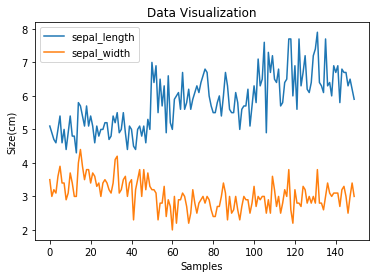

In [23]:
plt.plot(df[['sepal_length','sepal_width']])
plt.legend(['sepal_length','sepal_width'],loc='best')
plt.title('Data Visualization')
plt.xlabel("Samples")
plt.ylabel('Size(cm)')
plt.show()

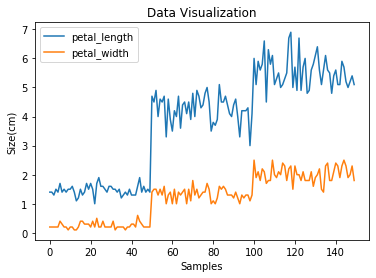

In [24]:
plt.plot(df[['petal_length','petal_width']])
plt.legend(['petal_length','petal_width'],loc='best')
plt.title('Data Visualization')
plt.xlabel("Samples")
plt.ylabel('Size(cm)')
plt.show()

Text(0.5, 0.98, 'Scatter Plot for Sepal Features')

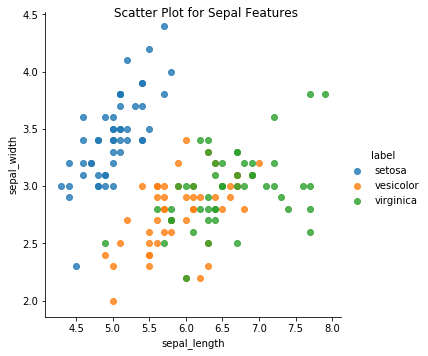

In [25]:
sns.lmplot('sepal_length','sepal_width', iris1, hue='label', fit_reg=False).fig.suptitle("Scatter Plot for Sepal Features")

Text(0.5, 0.98, 'Scatter Plot for Petal Features')

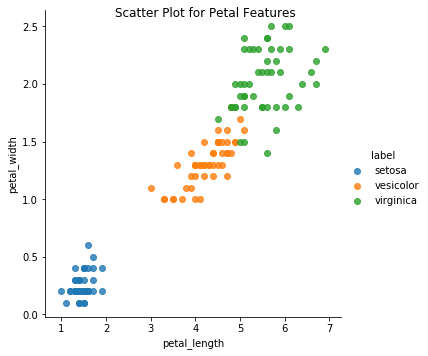

In [26]:
sns.lmplot('petal_length','petal_width', iris1, hue='label', fit_reg=False).fig.suptitle("Scatter Plot for Petal Features")

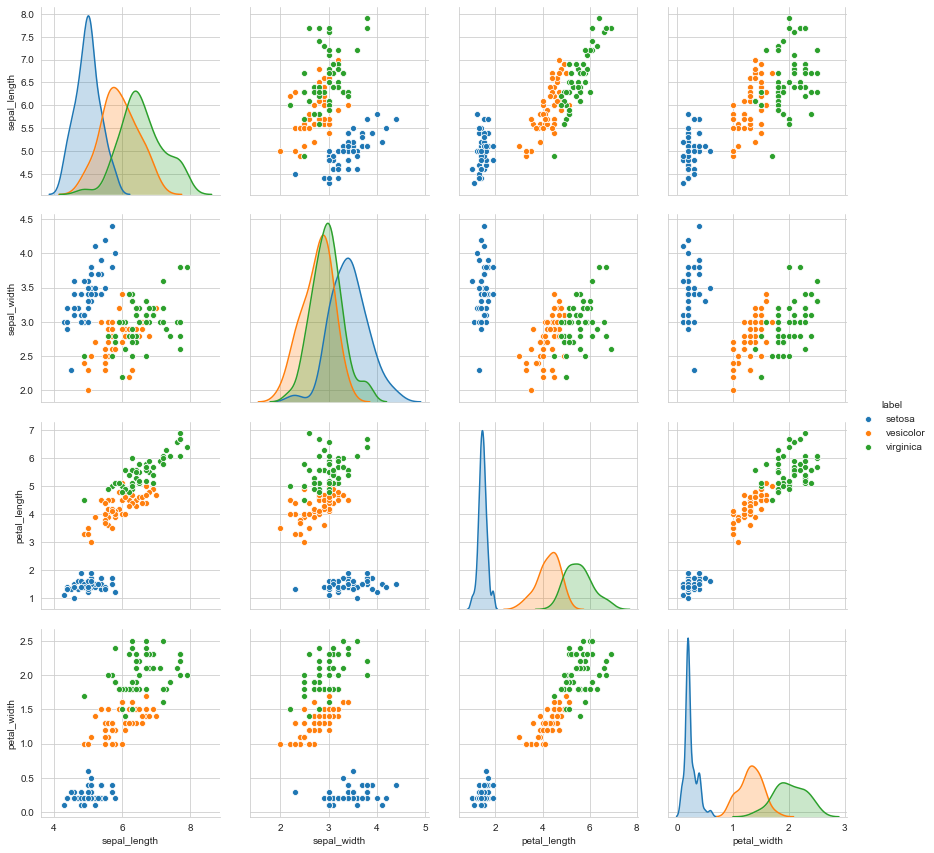

In [27]:
sns.set_style("whitegrid")
sns.pairplot(iris1,hue="label",size=3);
plt.show()

Text(0.5, 1.0, 'Data Visualization')

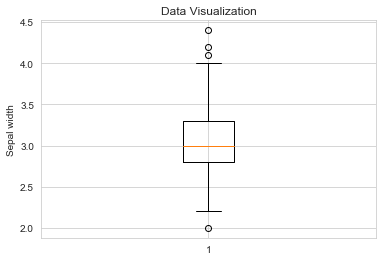

In [28]:
# box plot visualisation for the whole dataset.
plt.boxplot(df['sepal_width'])
plt.ylabel('Sepal width')
plt.title('Data Visualization')

Text(0.5, 1.0, 'Data Visualization')

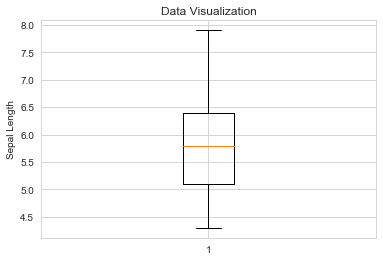

In [29]:
plt.boxplot(df['sepal_length'])
plt.ylabel('Sepal Length')
plt.title('Data Visualization')

Text(0.5, 1.0, 'Data Visualization')

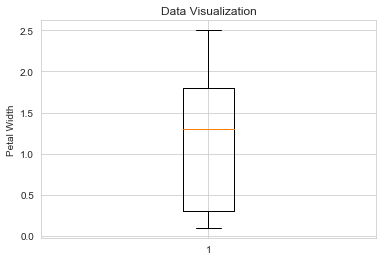

In [30]:
plt.boxplot(df['petal_width'])
plt.ylabel('Petal Width')
plt.title('Data Visualization')

Text(0.5, 1.0, 'Data Visualization')

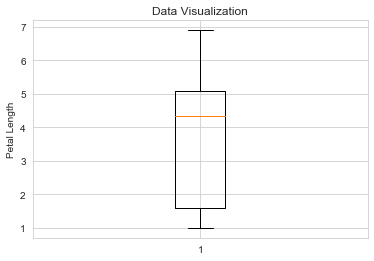

In [31]:
plt.boxplot(df['petal_length'])
plt.ylabel('Petal Length')
plt.title('Data Visualization')

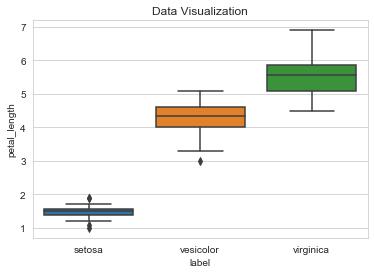

In [32]:
# classwise boxplot visualisation.
sns.boxplot(x="label",y="petal_length",data=iris1).set_title('Data Visualization')
plt.show()

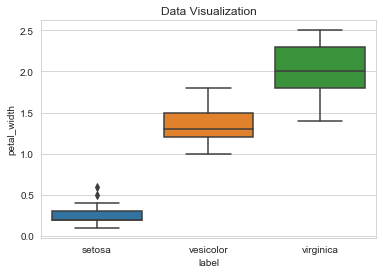

In [33]:
sns.boxplot(x="label",y="petal_width",data=iris1).set_title('Data Visualization')
plt.show()

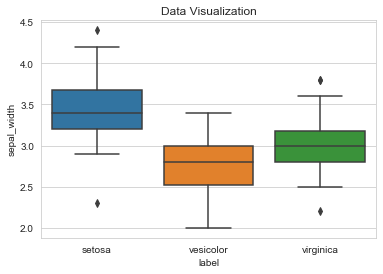

In [34]:
sns.boxplot(x="label",y="sepal_width",data=iris1).set_title('Data Visualization')
plt.show()

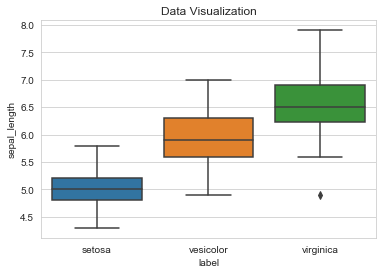

In [35]:
sns.boxplot(x="label",y="sepal_length",data=iris1).set_title('Data Visualization')
plt.show()

In [36]:
output.index

RangeIndex(start=0, stop=150, step=1)

In [37]:
# k fold being set to 5.
alg=LogisticRegression()
kf=KFold(n_splits=5,random_state=1,shuffle=True)
print(kf)

KFold(n_splits=5, random_state=1, shuffle=True)


In [38]:
kf.get_n_splits(train)

5

In [39]:
df=df.drop('label',1)

In [40]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [41]:
for train_index, test_index in kf.split(train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = output1.iloc[train_index], output1.iloc[test_index]
    clf=LogisticRegression(random_state=0).fit(X_train,y_train)
    pred=clf.predict(X_test)
    print("accuracy score is",accuracy_score(y_test,pred))
    print(pred)

accuracy score is 1.0
[0 0 1 2 0 0 1 1 2 0 0 2 1 1 2 2 0 0 1 0 1 2 2 2]
accuracy score is 0.9166666666666666
[0 2 1 2 1 2 1 2 0 1 1 2 2 2 2 2 2 0 1 2 2 0 1 2]
accuracy score is 0.875
[1 2 2 2 2 1 2 2 0 2 0 2 0 2 1 0 2 0 1 2 0 0 0 2]
accuracy score is 0.9583333333333334
[2 0 0 1 0 2 0 2 0 2 1 1 0 0 2 2 1 0 0 1 1 2 1 2]
accuracy score is 0.9583333333333334
[0 0 2 2 2 0 0 2 2 1 0 1 1 0 2 0 0 2 0 1 0 0 2 1]


In [42]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
clf.score(train, output1['label'])

0.9416666666666667

In [44]:
predicted=clf.predict(df)

In [45]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
len(predicted)

150

In [47]:
confusion_matrix(output['Label'],predicted)

array([[50,  0,  0],
       [ 0, 42,  8],
       [ 0,  1, 49]], dtype=int64)

In [48]:
lst_log=[]
for i in range(150):
    if(output.loc[i,'Label']!=predicted[i]):
        lst_log.append(i)
lst_log

[56, 59, 66, 70, 77, 83, 84, 85, 129]

In [49]:
predicted1=clf.predict(test)

In [50]:
predicted1

array([0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 2])

In [51]:
confusion_matrix(output2['label'],predicted1)

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  7]], dtype=int64)

In [52]:
# for test data
print(classification_report(output2['label'],predicted1, target_names=classes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.92      0.92      0.92        13
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [53]:
# for whole data
print(classification_report(output['Label'],predicted, target_names=classes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.84      0.90        50
   virginica       0.86      0.98      0.92        50

    accuracy                           0.94       150
   macro avg       0.95      0.94      0.94       150
weighted avg       0.95      0.94      0.94       150



## Gaussian Naive Bayes

In [54]:
for train_index, test_index in kf.split(train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = output1.iloc[train_index], output1.iloc[test_index]
    gnb = GaussianNB().fit(X_train,y_train)
    pred=gnb.predict(X_test)
    print("accuracy score is",accuracy_score(y_test,pred))
    print(pred)

accuracy score is 0.9583333333333334
[0 0 1 2 0 0 1 1 1 0 0 2 1 1 2 2 0 0 1 0 1 2 2 2]
accuracy score is 1.0
[0 2 1 2 1 2 1 2 0 1 1 1 2 2 2 2 2 0 1 2 2 0 1 1]
accuracy score is 0.9583333333333334
[1 2 2 2 2 1 2 2 0 2 0 2 0 1 1 0 1 0 1 2 0 0 0 2]
accuracy score is 0.9583333333333334
[2 0 0 1 0 2 0 1 0 2 1 1 0 0 2 2 1 0 0 1 1 1 1 2]
accuracy score is 0.9583333333333334
[0 0 1 2 1 0 0 2 2 1 0 1 1 0 2 0 0 2 0 1 0 0 2 1]


In [55]:
gnb.score(train, output1['label'])

0.9666666666666667

In [56]:
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
predicted1=gnb.predict(df)

In [58]:
predicted1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
confusion_matrix(output['Label'],predicted1)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]], dtype=int64)

In [60]:
lst_gb=[]
for i in range(150):
    if(output.loc[i,'Label']!=predicted1[i]):
        lst_gb.append(i)
lst_gb

[70, 77, 106, 119, 133, 134]

In [61]:
predicted=gnb.predict(test)

In [62]:
confusion_matrix(output2['label'],predicted)

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  7]], dtype=int64)

In [63]:
# for test data
print(classification_report(output2['label'],predicted, target_names=classes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.92      0.92      0.92        13
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [64]:
# for whole data
print(classification_report(output['Label'],predicted1, target_names=classes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



## K MEANS  

In [65]:
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(df)
    
    cluster_errors.append(clusters.inertia_)
    
pd.DataFrame({'num_clusters':cluster_range, 'Error': cluster_errors})

,num_clusters,Error
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182
5,6,39.066035
6,7,34.514105
7,8,30.064593
8,9,27.984873


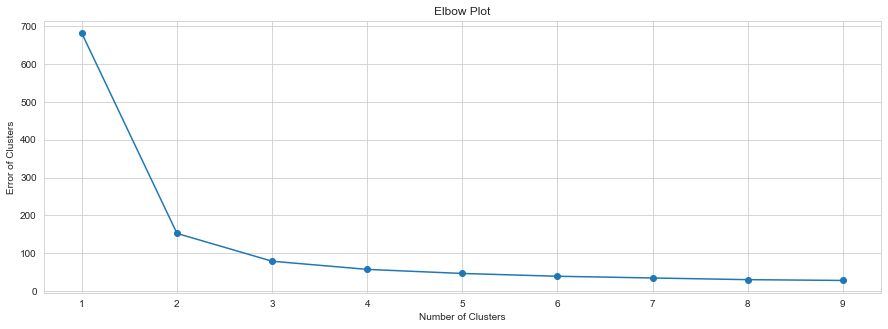

In [66]:
plt.figure(figsize=(15,5))
plt.plot(cluster_range,cluster_errors,marker = 'o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error of Clusters')
plt.xticks(cluster_range)
plt.show()

In [67]:
for train_index, test_index in kf.split(df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = output.iloc[train_index], output.iloc[test_index]
    y_pred = KMeans(n_clusters=3,random_state=1).fit_predict(X_train)

In [68]:
y_pred1 = KMeans(n_clusters=3,random_state=1).fit_predict(test)

In [69]:
y_pred = KMeans(n_clusters=3,random_state=1).fit_predict(df)

In [70]:
y_pred1

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 1, 1, 0, 1, 0])

In [71]:
output2['label']=output2['label'].map({0:1,1:0,2:2})
output2['label'].values

array([1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 1, 1, 0, 1, 2], dtype=int64)

In [72]:
accuracy_score(output2['label'].values,y_pred1)

0.9

In [73]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'Predicted')

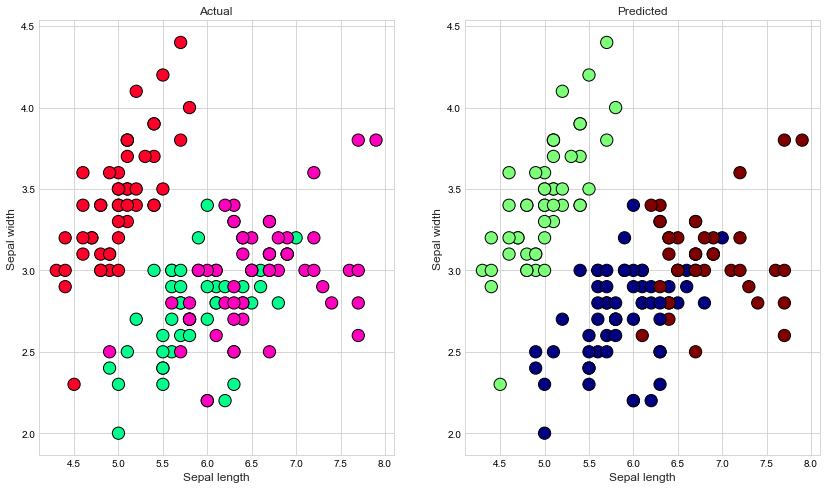

In [74]:
#this will tell us to which cluster does the data observations belong.
new_labels = y_pred
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,8))
axes[0].scatter(df.iloc[:, 0], df.iloc[:, 1],c=iris.target, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df.iloc[:, 0], df.iloc[:, 1],c=new_labels,  cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=12)
axes[0].set_ylabel('Sepal width', fontsize=12)
axes[1].set_xlabel('Sepal length', fontsize=12)
axes[1].set_ylabel('Sepal width', fontsize=12)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=12)
axes[1].set_title('Predicted', fontsize=12)

Text(0.5, 1.0, 'Predicted')

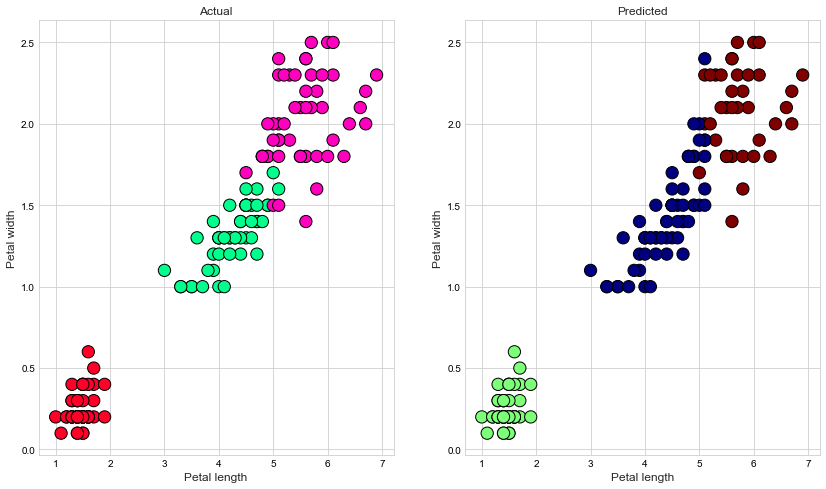

In [75]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,8))
axes[0].scatter(df.iloc[:, 2], df.iloc[:, 3],c=iris.target, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df.iloc[:, 2], df.iloc[:, 3],c=new_labels,  cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=12)
axes[0].set_ylabel('Petal width', fontsize=12)
axes[1].set_xlabel('Petal length', fontsize=12)
axes[1].set_ylabel('Petal width', fontsize=12)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=12)
axes[1].set_title('Predicted', fontsize=12)

Text(0.5, 1.0, 'Predicted')

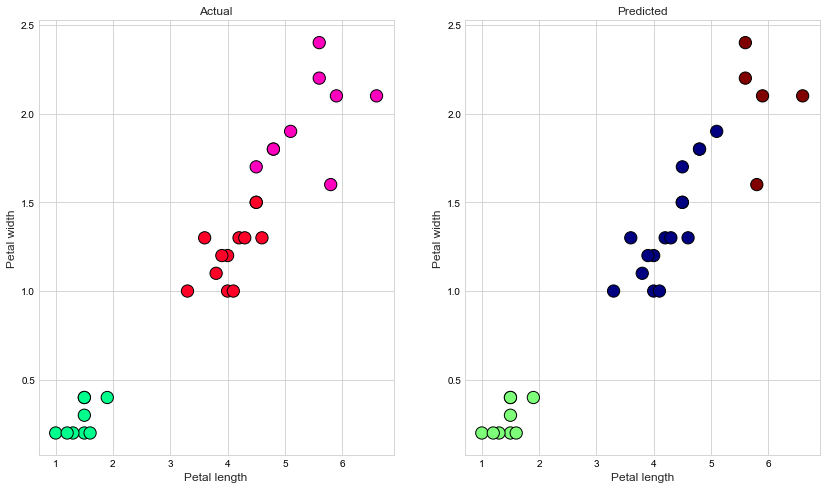

In [76]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,8))
axes[0].scatter(test.iloc[:, 2], test.iloc[:, 3],c=output2.label, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(test.iloc[:, 2], test.iloc[:, 3],c=y_pred1,  cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=12)
axes[0].set_ylabel('Petal width', fontsize=12)
axes[1].set_xlabel('Petal length', fontsize=12)
axes[1].set_ylabel('Petal width', fontsize=12)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=12)
axes[1].set_title('Predicted', fontsize=12)

Text(0.5, 1.0, 'Predicted')

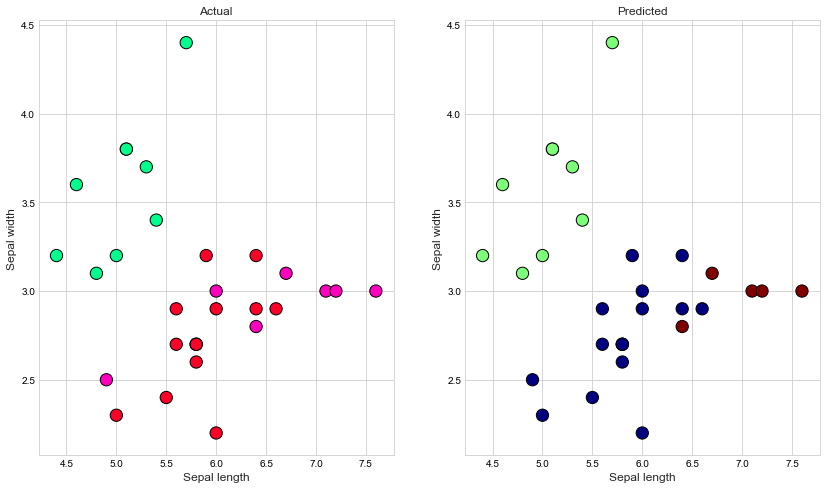

In [77]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,8))
axes[0].scatter(test.iloc[:, 0], test.iloc[:, 1],c=output2.label, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(test.iloc[:, 0], test.iloc[:, 1],c=y_pred1,  cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=12)
axes[0].set_ylabel('Sepal width', fontsize=12)
axes[1].set_xlabel('Sepal length', fontsize=12)
axes[1].set_ylabel('Sepal width', fontsize=12)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=12)
axes[1].set_title('Predicted', fontsize=12)

In [78]:
type(new_labels)

numpy.ndarray

In [79]:
new_labels=pd.Series(new_labels)
new_labels=new_labels.map({0:1,1:0,2:2})

In [80]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
new_labels=new_labels.to_numpy()
type(new_labels)

numpy.ndarray

In [82]:
lst_km=[]
for i in range(150):
    if(output.loc[i,'Label']!=new_labels[i]):
        lst_km.append(i)
lst_km

[52, 77, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]

In [83]:
accuracy_score(iris.target,new_labels)

0.8933333333333333

In [84]:
confusion_matrix(output['Label'],new_labels)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [85]:
print(classification_report(output['Label'],new_labels, target_names=classes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## PCA and Error Visualisation in 3D 

In [86]:
pca = PCA()
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### for the training dataste 

In [87]:
X_new1 = pca.fit_transform(train)

In [88]:
pca.get_covariance()

array([[ 0.7095098 , -0.03721989,  1.33229692,  0.54719188],
       [-0.03721989,  0.18097409, -0.30571709, -0.11403852],
       [ 1.33229692, -0.30571709,  3.23239216,  1.35466947],
       [ 0.54719188, -0.11403852,  1.35466947,  0.61176401]])

In [89]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92864588, 0.04961299, 0.01613339, 0.00560774])

Text(0.5, 1, 'Training data')

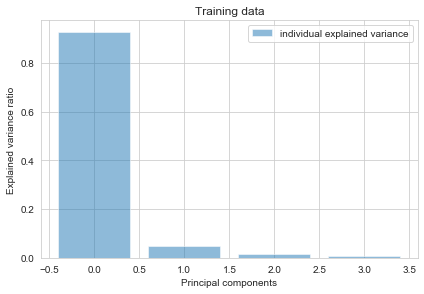

In [90]:
plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Training data')

#### the whole dataset

In [91]:
X_new = pca.fit_transform(df)

In [92]:
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [93]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0.5, 1, 'Whole Data')

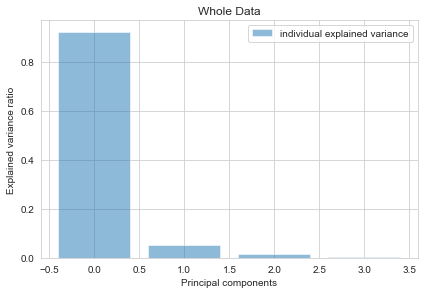

In [94]:
plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Whole Data')

In [95]:
X_new=pd.DataFrame(X_new)
X_new1=pd.DataFrame(X_new1)

## for the whole dataset 

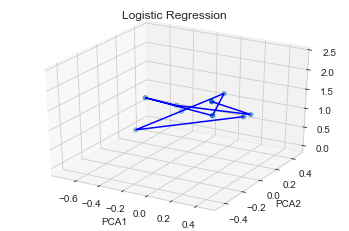

In [96]:

fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = X_new[0][lst_log]
x_line = X_new[1][lst_log]
y_line = X_new[2][lst_log]
ax.scatter3D(x_line, y_line, z_line);
z_line = X_new[0][lst_log]
x_line = X_new[1][lst_log]
y_line = X_new[2][lst_log]
ax.plot3D(x_line, y_line, z_line, 'blue');

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Logistic Regression')
plt.show()

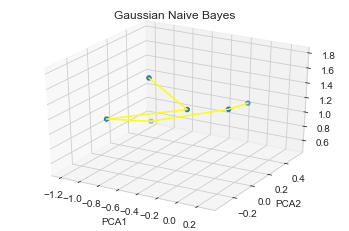

In [97]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line =X_new[0][lst_gb]
x_line = X_new[1][lst_gb]
y_line = X_new[2][lst_gb]
ax.scatter3D(x_line, y_line, z_line);


z_line = X_new[0][lst_gb]
x_line = X_new[1][lst_gb]
y_line = X_new[2][lst_gb]
ax.plot3D(x_line, y_line, z_line, 'yellow');
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Gaussian Naive Bayes')
plt.show()

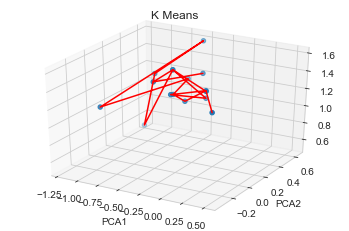

In [98]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line =X_new[0][lst_km]
x_line = X_new[1][lst_km]
y_line = X_new[2][lst_km]
ax.scatter3D(x_line, y_line, z_line)


z_line = X_new[0][lst_km]
x_line = X_new[1][lst_km]
y_line = X_new[2][lst_km]
ax.plot3D(x_line, y_line, z_line, 'red');

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K Means')
plt.show()